---
title: "Example Notebooks of SPICE Toolkit" \
author: "Naoya Ozaki" \
date: "26 November 2022" \
output: "spice_example"

---

## 1. SPICE Setup
Import SPICE library and download generic kernels.
This process takes long time because of downloading the large file (~120MB).

In [4]:
import SPICE
using Downloads

# Download generic kernels
genker_naif0012 = Downloads.download("https://naif.jpl.nasa.gov/pub/naif/generic_kernels/lsk/naif0012.tls")
genker_gm_de431 = Downloads.download("https://naif.jpl.nasa.gov/pub/naif/generic_kernels/pck/gm_de431.tpc")
genker_de440 = Downloads.download("https://naif.jpl.nasa.gov/pub/naif/generic_kernels/spk/planets//de440.bsp")

# Load generic kernels
SPICE.furnsh(genker_naif0012) # Leap seconds kernel
SPICE.furnsh(genker_gm_de431) # Gravity Constant
SPICE.furnsh(genker_de440) # Planetary ephemeris kernel

In [1]:
# Parameter Setting
et0 = SPICE.str2et("2021/04/06 13:52:32 UTC") # Initial Epoch
etf = SPICE.str2et("2022/04/06 13:52:32 UTC") # Final Epoch
num_grid = 10000 # Number of Grid

# Pre-calculation
et_all = LinRange(et0,etf,num_grid)
x_moon = zeros(num_grid, 6)

# Iteration
for i = 1:num_grid
    x_moon[i,:], _ = SPICE.spkez(301, et_all[i], "ECLIPJ2000", "NONE", 399)
end

x_moon

UndefVarError: UndefVarError: SPICE not defined

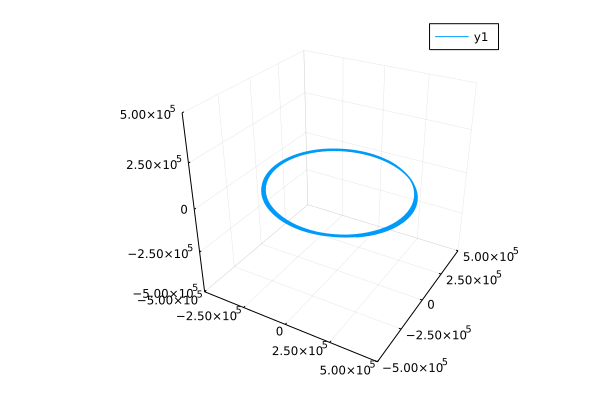

In [47]:
using Plots
plot(x_moon[:, 1], x_moon[:, 2], x_moon[:, 3], xlim=[-5e5, 5e5], ylim=[-5e5, 5e5], zlim=[-5e5, 5e5], aspect_ratio=:equal)